**In this project, potential customer revenue was calculated using rule based classification. The data set includes the prices of the products sold by an international game company and various demographic information about the users who buy these products. The records created after each sales transaction constitute the data set. Within the scope of the project, new level-based customer definitions were created and segments were created accordingly. By using the segments created, it was estimated how much revenue potential customers would bring to the company on average.**

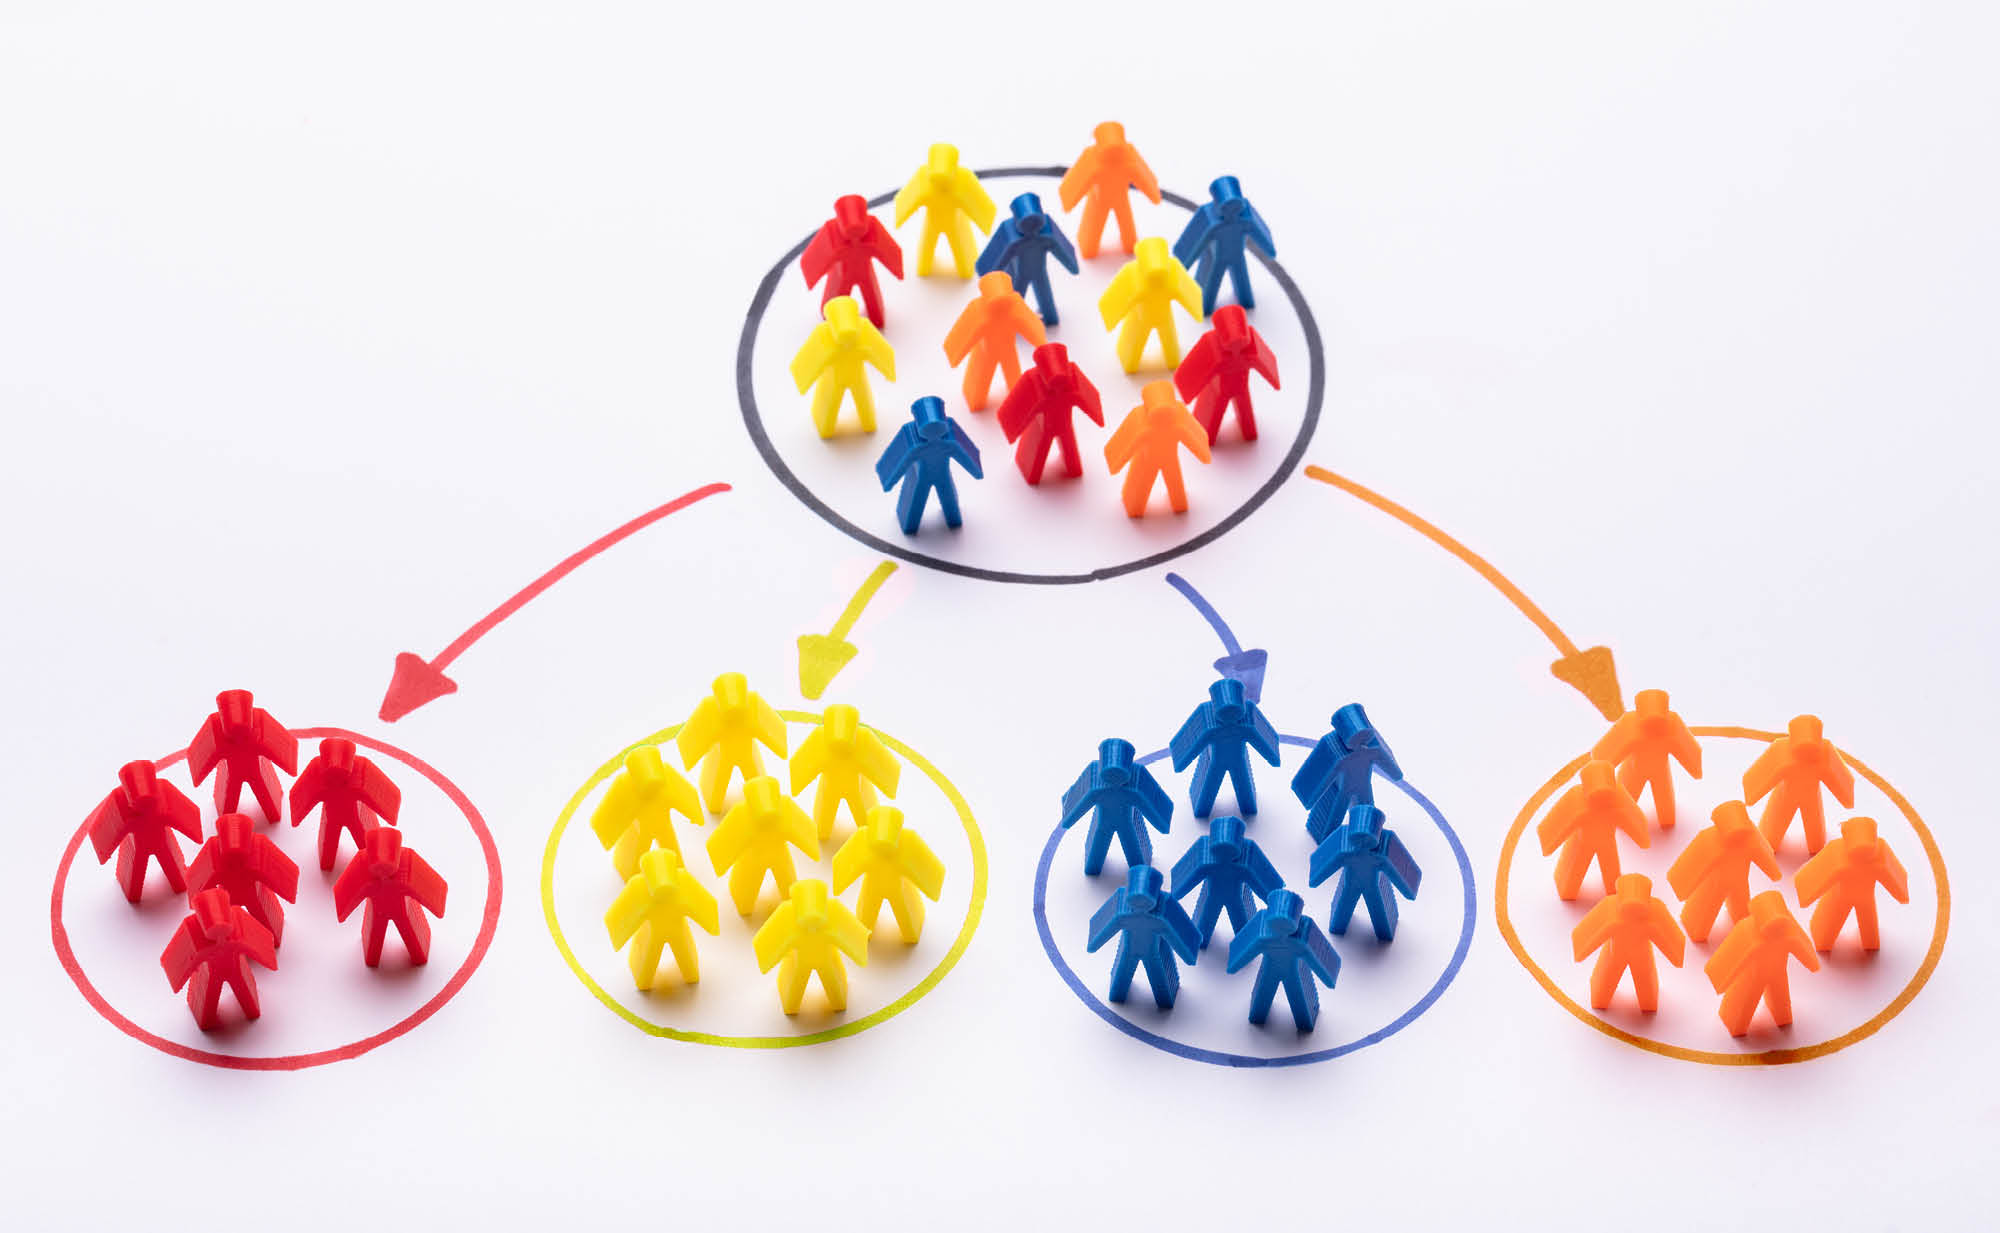


In [1]:
import pandas as pd
df = pd.read_csv("../input/persona-dataset/persona.csv")

**DATA EXPLORATION**

In [2]:
df.shape

(5000, 5)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PRICE    5000 non-null   int64 
 1   SOURCE   5000 non-null   object
 2   SEX      5000 non-null   object
 3   COUNTRY  5000 non-null   object
 4   AGE      5000 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


In [4]:
df.describe()

PRICE          AGE
count  5000.000000  5000.000000
mean     34.132000    23.581400
std      12.464897     8.995908
min       9.000000    15.000000
25%      29.000000    17.000000
50%      39.000000    21.000000
75%      39.000000    27.000000
max      59.000000    66.000000

**Number of unique source**

In [5]:
df["SOURCE"].nunique()

2

**Frequency of source**

In [6]:
df["SOURCE"].value_counts()

android    2974
ios        2026
Name: SOURCE, dtype: int64

**Number of unique price**

In [7]:
df["PRICE"].nunique()

6

**Number of sales by price**

In [8]:
df["PRICE"].value_counts()

29    1305
39    1260
49    1031
19     992
59     212
9      200
Name: PRICE, dtype: int64

**Number of sales by country**

In [9]:
df["COUNTRY"].value_counts()

usa    2065
bra    1496
deu     455
tur     451
fra     303
can     230
Name: COUNTRY, dtype: int64

**Total earned revenue from sales by country**

In [10]:
df.groupby("COUNTRY").agg({"PRICE" : "sum"})

PRICE
COUNTRY       
bra      51354
can       7730
deu      15485
fra      10177
tur      15689
usa      70225

**Number of sales by source types**

In [11]:
df.groupby("SOURCE").agg({"PRICE" : "count"})

PRICE
SOURCE        
android   2974
ios       2026

**Price averages by country**

In [12]:
df.groupby("COUNTRY").agg({"PRICE" : "mean"})

PRICE
COUNTRY           
bra      34.327540
can      33.608696
deu      34.032967
fra      33.587459
tur      34.787140
usa      34.007264

**Price averages by sources**

In [13]:
df.groupby("SOURCE").agg({"PRICE" : "mean"})

PRICE
SOURCE            
android  34.174849
ios      34.069102

**Price averages by Country and Source**

In [14]:
df.groupby(["COUNTRY", "SOURCE"]).agg({"PRICE" : "mean"})

PRICE
COUNTRY SOURCE            
bra     android  34.387029
        ios      34.222222
can     android  33.330709
        ios      33.951456
deu     android  33.869888
        ios      34.268817
fra     android  34.312500
        ios      32.776224
tur     android  36.229437
        ios      33.272727
usa     android  33.760357
        ios      34.371703

**Average earnings by Country, Source, Sex and Age**

In [15]:
df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE" : "mean"})

PRICE
COUNTRY SOURCE  SEX    AGE           
bra     android female 15   38.714286
                       16   35.944444
                       17   35.666667
                       18   32.255814
                       19   35.206897
...                               ...
usa     ios     male   42   30.250000
                       50   39.000000
                       53   34.000000
                       55   29.000000
                       59   46.500000

[348 rows x 1 columns]

**The previous output is sorted in descending order of price. The result is saved as agg_df.**

In [16]:
agg_df = df.groupby(["COUNTRY","SOURCE","SEX","AGE"]).agg({"PRICE" : "mean"}).sort_values(by = "PRICE", ascending = False)

agg_df

PRICE
COUNTRY SOURCE  SEX    AGE       
bra     android male   46    59.0
usa     android male   36    59.0
fra     android female 24    59.0
usa     ios     male   32    54.0
deu     android female 36    49.0
...                           ...
usa     ios     female 38    19.0
                       30    19.0
can     android female 27    19.0
fra     android male   18    19.0
deu     android male   26     9.0

[348 rows x 1 columns]

**The indexes have been converted to variables and the changes have been made permanent with the inplace method.**

In [17]:
agg_df.reset_index(["COUNTRY","SOURCE","SEX","AGE"],inplace = True)

agg_df

COUNTRY   SOURCE     SEX  AGE  PRICE
0       bra  android    male   46   59.0
1       usa  android    male   36   59.0
2       fra  android  female   24   59.0
3       usa      ios    male   32   54.0
4       deu  android  female   36   49.0
..      ...      ...     ...  ...    ...
343     usa      ios  female   38   19.0
344     usa      ios  female   30   19.0
345     can  android  female   27   19.0
346     fra  android    male   18   19.0
347     deu  android    male   26    9.0

[348 rows x 5 columns]

**The numeric variable age was converted to a categorical variable. Then the ranges were created.**

In [18]:
agg_df["AGE_CAT"] = agg_df["AGE"].astype("category")

agg_df["AGE_CAT"] = pd.cut(agg_df.AGE_CAT,[0,18,23,30,40,70],labels = ['0_18', '19_23', '24_30', '31_40', '41_70'])

agg_df

COUNTRY   SOURCE     SEX  AGE  PRICE AGE_CAT
0       bra  android    male   46   59.0   41_70
1       usa  android    male   36   59.0   31_40
2       fra  android  female   24   59.0   24_30
3       usa      ios    male   32   54.0   31_40
4       deu  android  female   36   49.0   31_40
..      ...      ...     ...  ...    ...     ...
343     usa      ios  female   38   19.0   31_40
344     usa      ios  female   30   19.0   24_30
345     can  android  female   27   19.0   24_30
346     fra  android    male   18   19.0    0_18
347     deu  android    male   26    9.0   24_30

[348 rows x 6 columns]

**A variable named customer_level_based has been created and added to the dataset. Since there can be more than one of the same expression, singularization has been made with the groupby method.**

In [19]:
agg_df["customers_level_based"] = [col[0].upper() + "_" + col[1].upper() + "_" + col[2].upper() + "_" + col[5] for col in agg_df.values]

agg_df = agg_df.groupby("customers_level_based").agg({"PRICE" : "mean"})

agg_df

PRICE
customers_level_based              
BRA_ANDROID_FEMALE_0_18   35.645303
BRA_ANDROID_FEMALE_19_23  34.077340
BRA_ANDROID_FEMALE_24_30  33.863946
BRA_ANDROID_FEMALE_31_40  34.898326
BRA_ANDROID_FEMALE_41_70  36.737179
...                             ...
USA_IOS_MALE_0_18         33.983495
USA_IOS_MALE_19_23        34.901872
USA_IOS_MALE_24_30        34.838143
USA_IOS_MALE_31_40        36.206324
USA_IOS_MALE_41_70        35.750000

[109 rows x 1 columns]

**Price values ​​are segmented and the Segment variable is added to the dataset.**

In [20]:
agg_df["SEGMENT"] = pd.qcut(agg_df["PRICE"],4, labels = ["D","C","B","A"])

agg_df.groupby("SEGMENT").agg({"PRICE" : ["mean","max","sum"]})

agg_df = agg_df.reset_index()

agg_df

customers_level_based      PRICE SEGMENT
0     BRA_ANDROID_FEMALE_0_18  35.645303       B
1    BRA_ANDROID_FEMALE_19_23  34.077340       C
2    BRA_ANDROID_FEMALE_24_30  33.863946       C
3    BRA_ANDROID_FEMALE_31_40  34.898326       B
4    BRA_ANDROID_FEMALE_41_70  36.737179       A
..                        ...        ...     ...
104         USA_IOS_MALE_0_18  33.983495       C
105        USA_IOS_MALE_19_23  34.901872       B
106        USA_IOS_MALE_24_30  34.838143       B
107        USA_IOS_MALE_31_40  36.206324       A
108        USA_IOS_MALE_41_70  35.750000       B

[109 rows x 3 columns]

**A function has been created to see the revenue that potential customers can bring and to find the segment.**

In [21]:
def find_segment():
    COUNTRY = input("Enter the country (USA / BRA / DEU / TUR / FRA / CAN): ")
    SOURCE = input("Enter the source (ANDROID / IOS): ")
    SEX = input("Enter the sex (MALE / FEMALE): ")
    AGE = int(input("Enter the age: "))
    if AGE < 19:
        AGE = "0_18"
    elif AGE > 18 and AGE < 24:
        AGE = "19_23"
    elif AGE > 23 and AGE < 31:
        AGE = "24_30"
    elif AGE > 30 and AGE < 41:
        AGE = "31_40"
    else:
        AGE = "41_70"
    new_user = COUNTRY + "_" + SOURCE + "_" + SEX + "_" + AGE
    print(agg_df[agg_df["customers_level_based"] == new_user])

In [22]:
find_segment()

StdinNotImplementedError: raw_input was called, but this frontend does not support input requests.